# <u>DATA SCIENCE PROJECT PROGRESS REPORT (NOV 13th 2022)</u>
## Hrishikesh Badve, Rayan Rouf, Nishant Desai, Aditi Anup, Milind Kurma
## Github Link: https://github.com/HrishikeshBadve/Data-Science-Project-Fall-2022

### <u>INTRODUCTION</u>

Considering our adopted Problem Statement: **Influences of Climatic change on the food chain supply globally**, we collected relevant data which will be explained below.
The data obtained were multiple data sets on Average, Maximum and Minimum temperatures across the mainland United States through the years 1900 to 2019. Further, since this project aims to draw focus on the impacts of climate change on crop production, we could not ignore the Carbon Dioxide (CO2) present in the atmosphere over that time frame, so we have included a Parts Per Million CO2 data set for the years 1958 through 2019 as well. We have also obtained a crop data set and are looking into how to better correlate this data with our climate (temperature and CO2) metrics.



### <u>CHANGES SINCE PROPOSAL</u>

Changes made from our previous proposal include:
* Initially we planned to look at agriculture as a whole segment, but we will now be trying to focus on individual crops behavior over the years. For example, upon further research we were able to arrive at the conclusion that corn production is highly susceptible to drastic changes in the climate. This would have led to an immense slowdown in corn yield were it not for human interventions and innovative agricultural practices. 
* During our research we realized that as the years have passed, production, contrary to our hypothesis has increased. However, this is due to a variety of factors that include newer and more efficient farming practices, fertilization, irrigation, increased population, and human innovation at the heart of it. These do not indicate that climate is not having an effect on agriculture in the United States.
* Hence, we are changing our approach to identifying a surge in Carbon Dioxide Parts per Million in our atmosphere over the past decades. This increased amount of CO2 has led to an increase in global warming which is directly responsible for catastrophic events like droughts and flooding, droughts and flooding based on data released by the United States government have been one of the most significant factors that affect the yield of a crop.

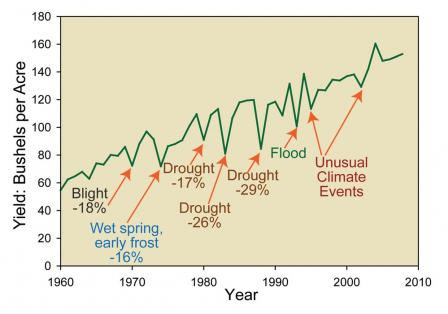

### <u>DATA</u>

* The data we acquired for climate data pertaining to the average, maximum and minimum temperatures was taken from the US Government Website. The National Centers for Environmental Information (NCEI) and the National Oceanic and Atmospheric Administration (NOAA) were the two main resources for our climate data. We have taken data from the 1900s to 2019. Our CO2 Parts per million data was taken from Datahub (datahub.io). The data sets after cleaning and processing the required data relevant to our visualizations span 1094 rows. 
* We still need to add our flood and drought data as we are trying to figure out how to work with our crop data.
* Besides just raw data and csv files we scoured through multiple news articles and research findings to corroborate our approach. Some of the references used were The New York Times, The Guardian, NOAA, NASA, and The Washington Post.

### <u>EDA AND VISUALIZATIONS</u>

We had an initial hypothesis that CO2 levels would be on a constant rise from the 1960's due to industrialization causeing global warming. Another hypothesis of our's was that the Temperature values (Average, Maximum and Minimum) would be commensurate with the increase of CO2 levels, i.e there would be a noticable increase in temperature during this time. This is the crux of our visualization attempts.

In [30]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [32]:
co2_data = pd.read_csv(r"co2-mm-mlo_csv.csv")
dates = co2_data['Date']
Average_co2 = co2_data['Average']
plot = {}
count = {}
for i in range(len(dates)):
    year = dates[i][-4:]
    if year not in plot.keys():
        plot[year] = Average_co2[i]
        count[year] = 1
    else:
        plot[year] += Average_co2[i]
        count[year] += 1

for i in plot.keys():
    plot[i] = plot[i]/count[i]
plot
years = plot.keys()
years = list(years)
average_co2 = plot.values()
average_co2 = list(average_co2)
d= {'Year' : years, 'Average' : average_co2}
co2_df = pd.DataFrame(d)
co2_df

,Year,Average
0,1958,232.267000
1,1959,315.974167
2,1960,316.907500
3,1961,317.637500
4,1962,318.450833
...,...,...
56,2014,398.647500
57,2015,400.834167
58,2016,404.239167
59,2017,406.553333


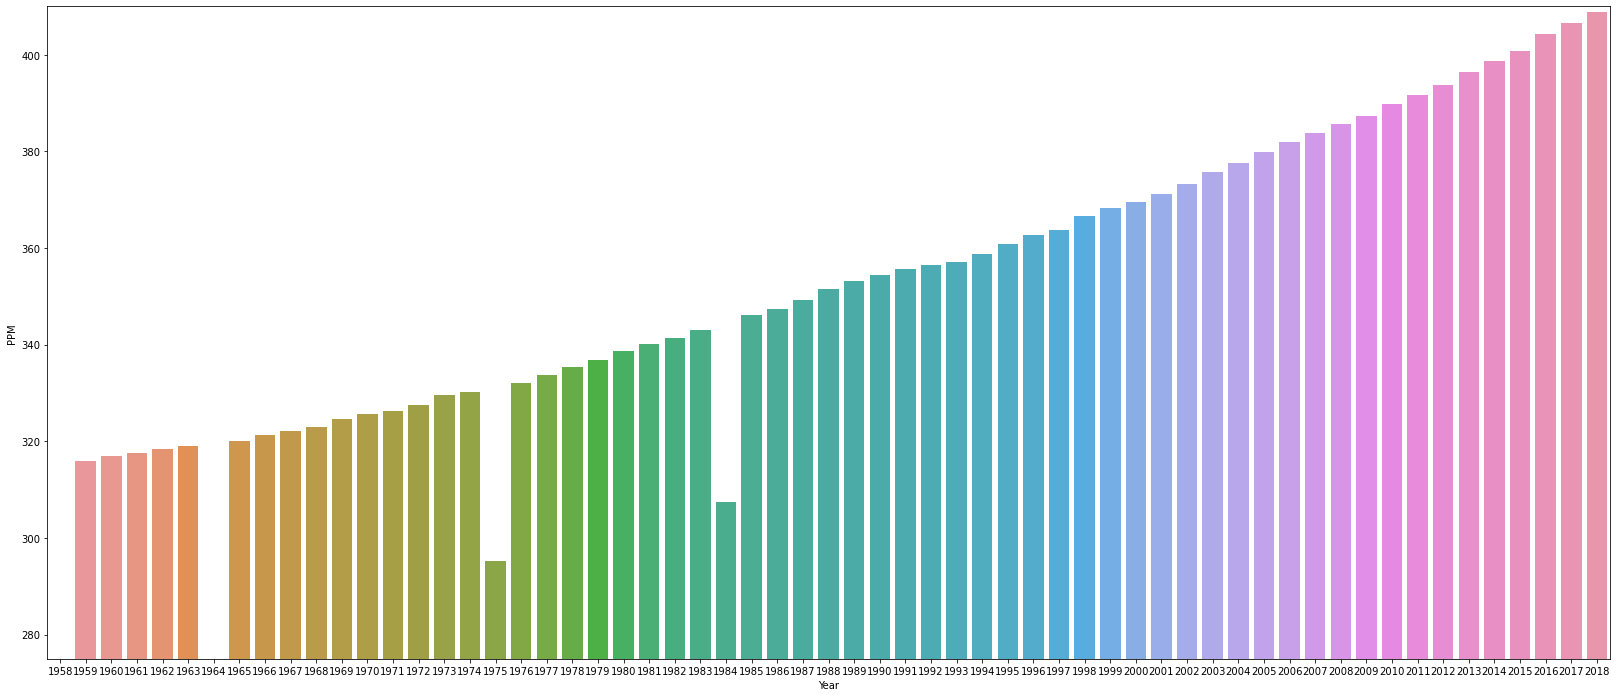

In [33]:
rcParams['figure.figsize'] = 28,12
ax=sns.barplot(x="Year", y="Average", data=co2_df)
ax.set_ylim(275, 410)
plt.ylabel('PPM')
plt.show()

#### This graph shows the drastic increase in CO2 levels in our atmosphere in the USA from 1960 to 2018. We use this visualization to support our initial hypothesis.

In [34]:
avg_temp_data = pd.read_csv(r"Avg_Temp.csv")
temp_date = avg_temp_data['Date']
dates = avg_temp_data['Date']
Average_temp = avg_temp_data['Value']
plot = {}

for i in range(len(dates)):
    year = str(dates[i])[0:4]
    if year not in plot.keys():
        plot[year] = Average_temp[i]
    else:
        plot[year] += Average_temp[i]
plot
temp_dict = {}
for i in plot.keys():
    if int(i)>1957 and int(i)<2019:
        temp_dict[i] = plot[i]

temp_dict
years = temp_dict.keys()
years = list(years)
average_temp = temp_dict.values()
average_temp = list(average_temp)
d= {'Year' : years, 'Average' : average_temp}
temp_df = pd.DataFrame(d)
temp_df


,Year,Average
0,1958,51.93
1,1959,52.10
2,1960,51.44
3,1961,51.87
4,1962,51.90
...,...,...
56,2014,52.54
57,2015,54.40
58,2016,54.92
59,2017,54.55


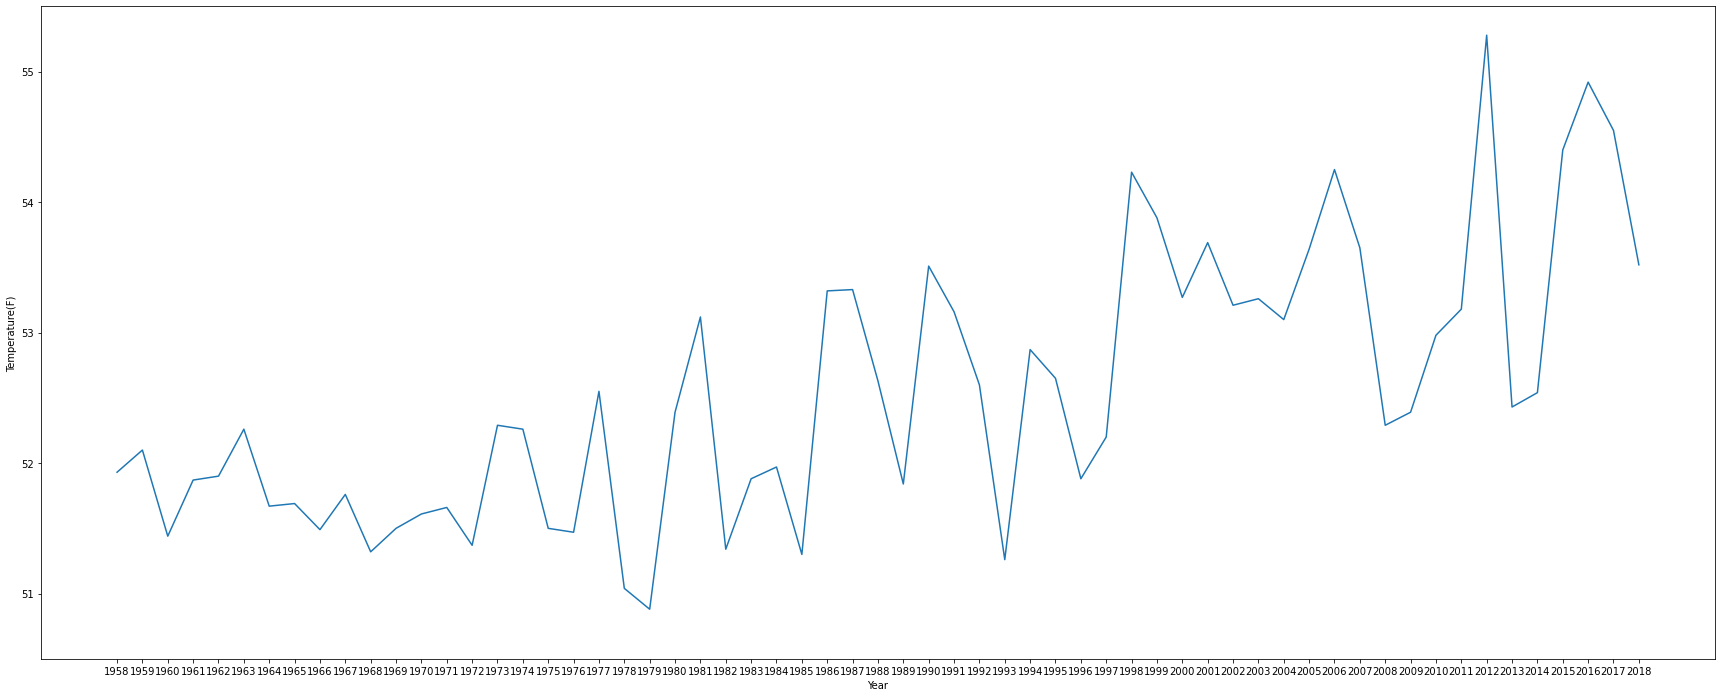

In [35]:
rcParams['figure.figsize'] = 30,12
ax=sns.lineplot(x="Year", y="Average", data=temp_df)
ax.set_ylim(50.5, 55.5)
plt.ylabel('Temperature(F)')
plt.show()

In [36]:
decade = {}
count = {}
for i in years:
    j = i[0:3] + '0'
    if j not in decade:
        decade[j] = temp_dict[i]
        count[j] = 1
    else:
        decade[j] += temp_dict[i]
        count[j] += 1

for i in decade.keys():
    decade[i] = decade[i]/count[i]

In [37]:
decades = decade.keys()
decades = list(decades)
average_temp_decade = decade.values()
average_temp_decade = list(average_temp_decade)
d= {'Year' : decades, 'Average' : average_temp_decade}
decade_df = pd.DataFrame(d)
decade_df

,Year,Average
0,1950,52.015000
1,1960,51.690000
2,1970,51.663000
3,1980,52.312000
4,1990,52.824000
5,2000,53.275000
6,2010,53.755556


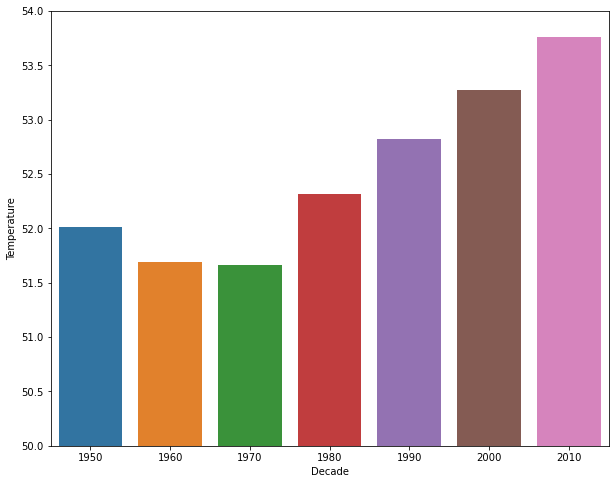

In [38]:
rcParams['figure.figsize'] = 10,8
ax=sns.barplot(x="Year", y="Average", data=decade_df)
ax.set_ylim(50, 54)
plt.ylabel('Temperature')
plt.xlabel('Decade')
plt.show()

#### This plot shows the drastic increase in average temperature values through the decades since 1950 till present date.

In [39]:
max_temp_data = pd.read_csv(r"Max_Temp.csv")
temp_date = max_temp_data['Date']
dates = max_temp_data['Date']
Max_temp = max_temp_data['Value']
plot = {}

for i in range(len(dates)):
    year = str(dates[i])[0:4]
    if year not in plot.keys():
        plot[year] = Max_temp[i]
    else:
        plot[year] += Max_temp[i]
plot
temp_dict = {}
for i in plot.keys():
    if int(i)>1957 and int(i)<2019:
        temp_dict[i] = plot[i]

temp_dict
years = temp_dict.keys()
years = list(years)
max_temp = temp_dict.values()
max_temp = list(max_temp)
d= {'Year' : years, 'Max' : max_temp}
temp_df = pd.DataFrame(d)
temp_df


,Year,Max
0,1958,63.73
1,1959,64.15
2,1960,63.43
3,1961,63.82
4,1962,63.96
...,...,...
56,2014,64.34
57,2015,66.07
58,2016,66.69
59,2017,66.35


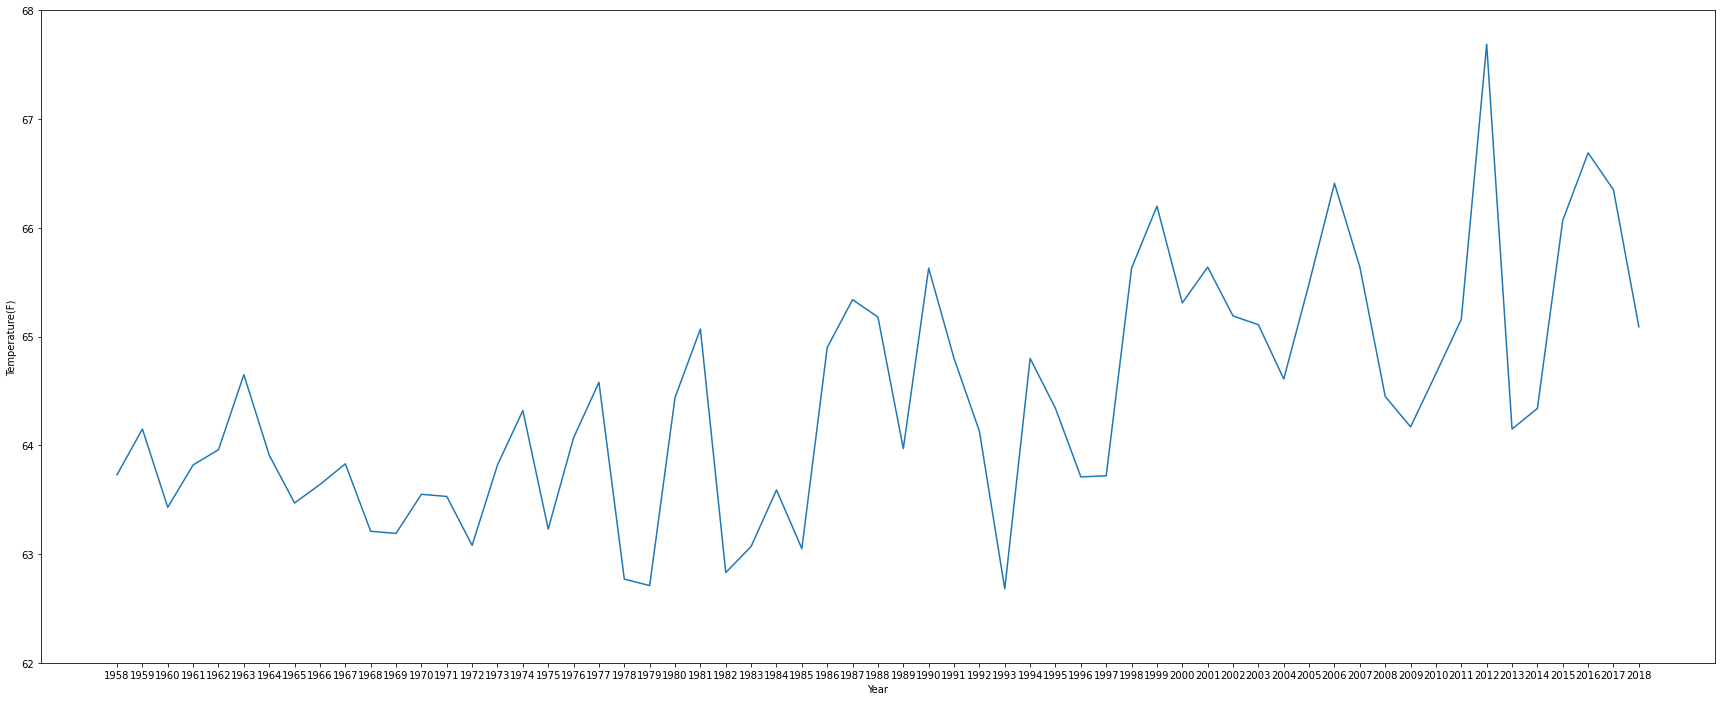

In [40]:
rcParams['figure.figsize'] = 30,12
ax=sns.lineplot(x="Year", y="Max", data=temp_df)
ax.set_ylim(62, 68)
plt.ylabel('Temperature(F)')
plt.show()

In [41]:
min_temp_data = pd.read_csv(r"Min_Temp.csv")
temp_date = min_temp_data['Date']
dates = min_temp_data['Date']
Min_temp = min_temp_data['Value']
plot = {}

for i in range(len(dates)):
    year = str(dates[i])[0:4]
    if year not in plot.keys():
        plot[year] = Min_temp[i]
    else:
        plot[year] += Min_temp[i]
plot
temp_dict = {}
for i in plot.keys():
    if int(i)>1957 and int(i)<2019:
        temp_dict[i] = plot[i]

temp_dict
years = temp_dict.keys()
years = list(years)
min_temp = temp_dict.values()
min_temp = list(min_temp)
d= {'Year' : years, 'Min' : min_temp}
temp_df = pd.DataFrame(d)
temp_df

,Year,Min
0,1958,40.13
1,1959,40.06
2,1960,39.45
3,1961,39.91
4,1962,39.84
...,...,...
56,2014,40.73
57,2015,42.71
58,2016,43.13
59,2017,42.74


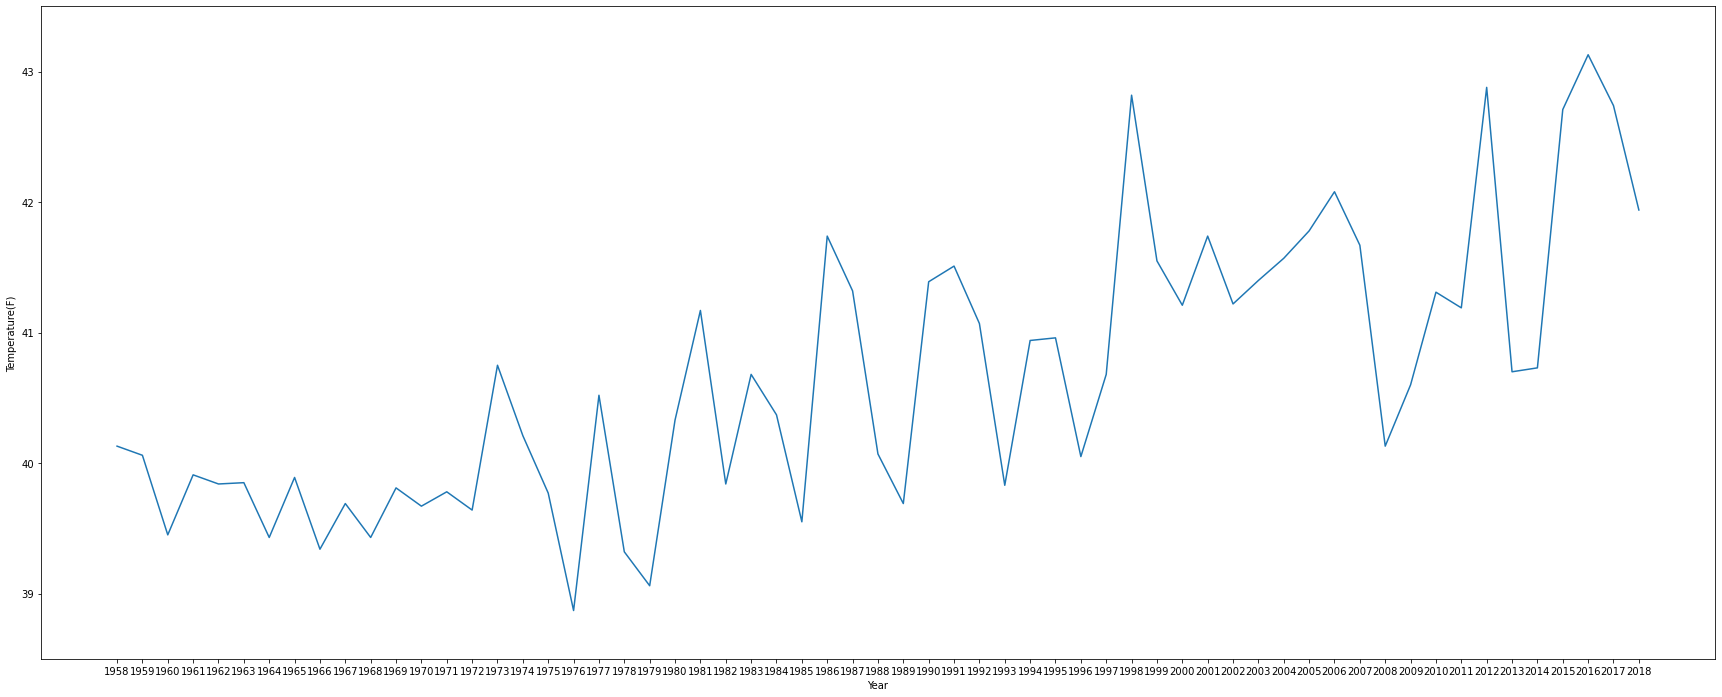

In [42]:
rcParams['figure.figsize'] = 30,12
ax=sns.lineplot(x="Year", y="Min", data=temp_df)
ax.set_ylim(38.5, 43.5)
plt.ylabel('Temperature(F)')
plt.show()

#### The temperature visualizations also show a steady increase from the 1960's till present date. This also aligns with our initial hypothesis, that increased CO2 levels in the atmosphere causes an effective rise in temperature.

### <u>ML MODEL</u>

We plan on working on an Machine Learning model which will predict future trends. We are unsure about what exact trends to pursue, however we are currently looking at predicting the rise in temperature values, or the number of floods/droughts in the future. 
We could utilize past data which we have gathered and will continue to gather in order to build a supervised learning model with adequate accuracy.

#### CLUSTERING
We ran a K-Means clustering algorithm to form 3 clusters for the average temperature as well as the CO2 level datasets. These results show a stark similarity between the 2 datasets. 

In [43]:
d = {'Years': years, 'Temperature': average_temp, 'Average_CO2': average_co2}

weather = pd.DataFrame(d)

# ax3=sns.lmplot(x="Years", y="Temperature",hue="Average CO2", data=weather)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#SSE
k_rng=range(1,10)
sse=[]
for k in k_rng:
    k2=KMeans(n_clusters=k)
    k2.fit(weather[['Temperature','Average_CO2']])
    sse.append(k2.inertia_)

#Scaling the data
n2 = weather.drop('Years', axis=1)
# n2 = weather.drop('cluster', axis=1)
# n2=weather.copy(deep=True)

scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(n2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Temperature', 'Average_CO2'])




C:\Users\hrish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
test1=df_scaled

test1['Years']=weather['Years'].copy(deep=True)
# test1 = test1.drop('Years', axis=1)
km= KMeans(n_clusters=3)

y_predicted=km.fit_predict(test1[['Temperature','Average_CO2']])
test1['cluster']=y_predicted


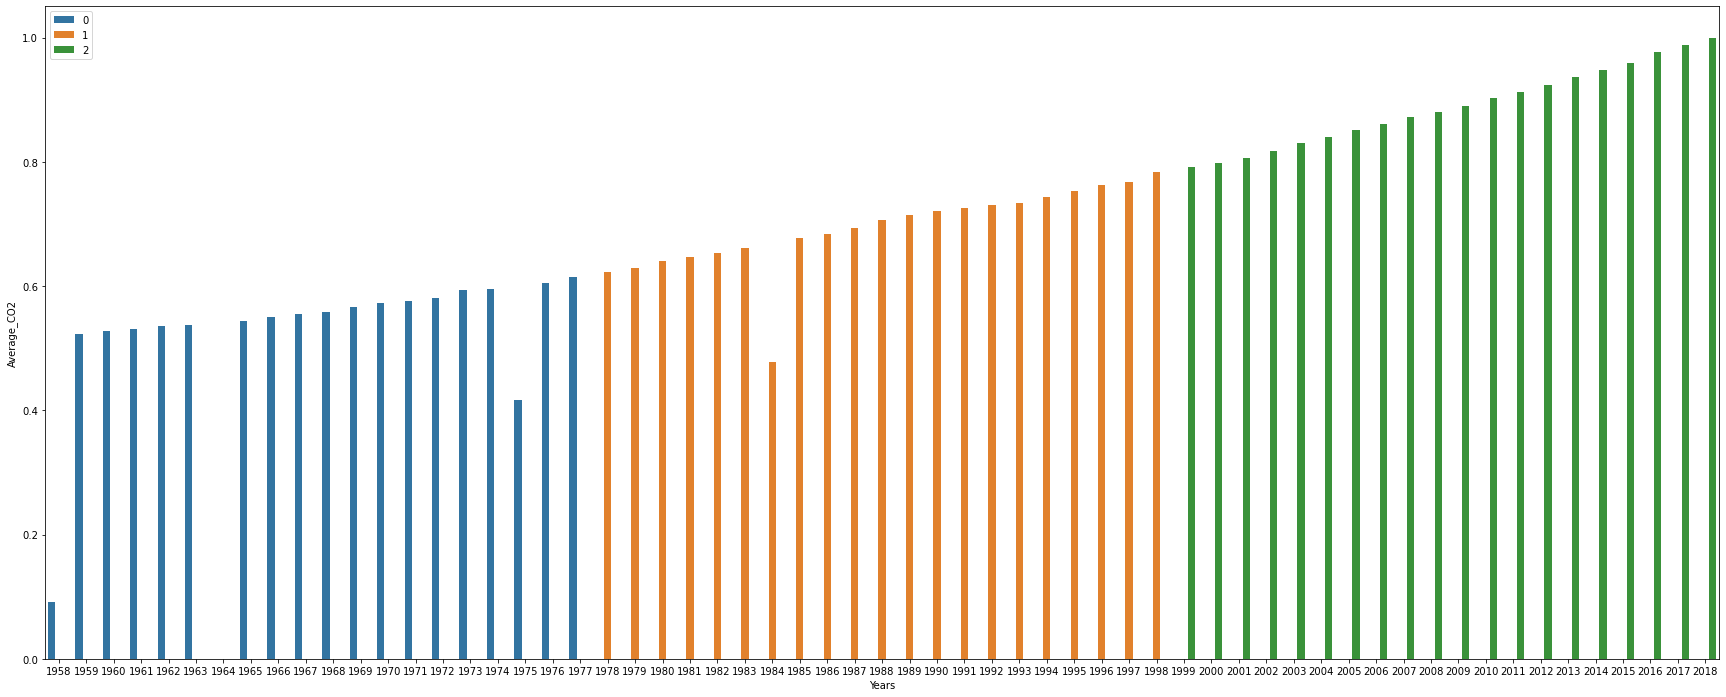

In [50]:
test2=df_scaled
# df_scaled

test2=test2.drop('cluster',axis=1)
test2=test2.drop('Temperature',axis=1)
test2['Years']=weather['Years'].copy(deep=True)

km= KMeans(n_clusters=3)
y_predicted1=km.fit_predict(test2[['Years','Average_CO2']])
test2['cluster']=y_predicted1
sns.barplot(x='Years',y='Average_CO2',data=test2,hue='cluster')
plt.legend(loc='upper left')

#### This is the result of K-Means clustering algorithm on CO2 levels vs Years. This is taking number of clusters = 3

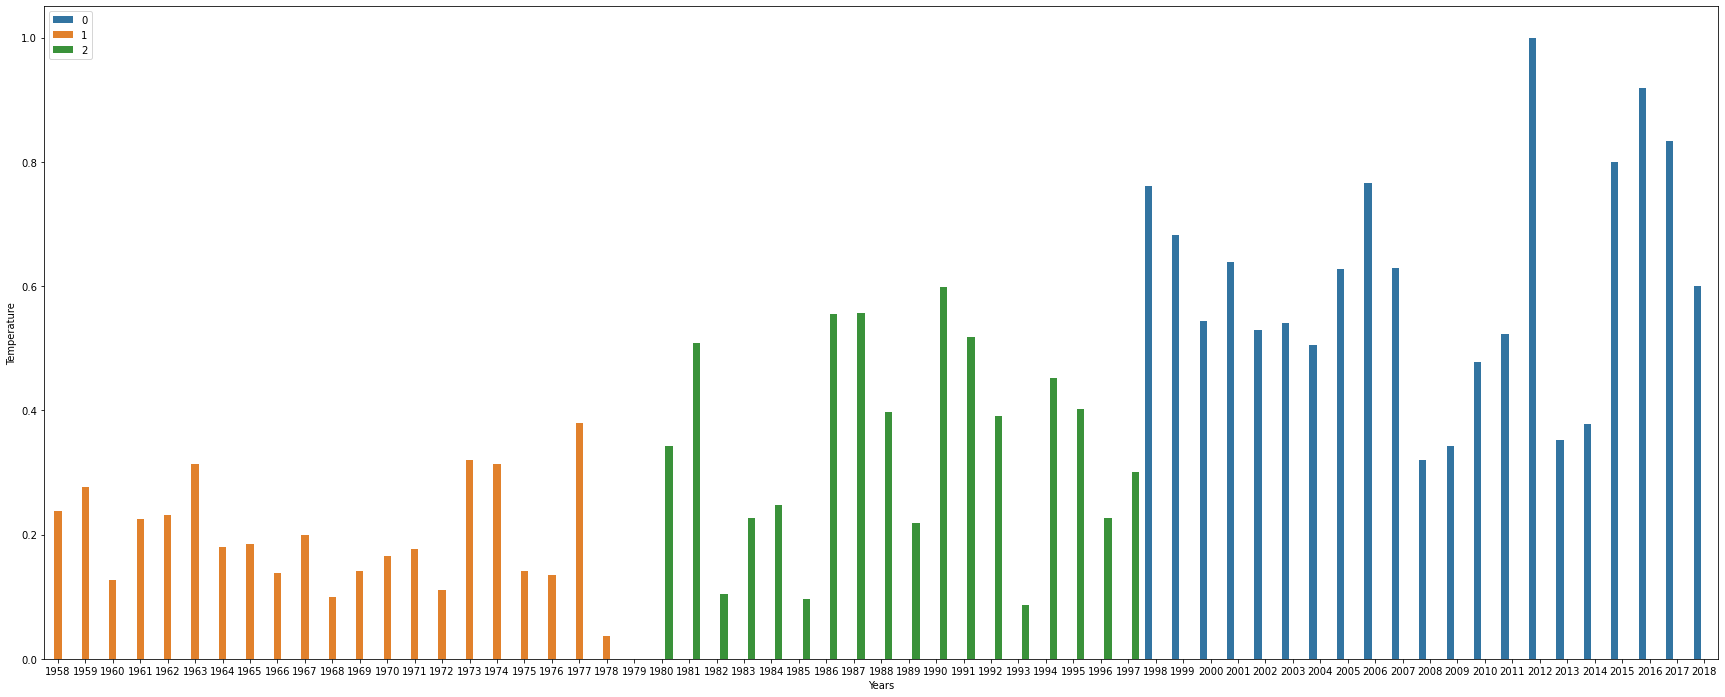

In [54]:
test3=df_scaled
# df_scaled

test3=test3.drop('cluster',axis=1)
test3=test3.drop('Average_CO2',axis=1)
test3['Years']=weather['Years'].copy(deep=True)
km= KMeans(n_clusters=3)
y_predicted2=km.fit_predict(test3[['Years','Temperature']])
test3['cluster']=y_predicted2
sns.barplot(x='Years',y='Temperature',data=test3,hue='cluster')
plt.legend(loc='upper left')

#### This is the result of K-Means clustering algorithm on CTemperature levels vs Years. This is taking number of clusters = 3

For CO2 levels, the cluster boundaries were: 
Cluster1 - 1958-1977
Cluster2 - 1978-1998
Cluster3 - 1999-2018

For the Temperature levels, the cluster boundaries were:
Cluster1 - 1958-1978
Cluster2 - 1979-1997
Cluster3 - 1998-2018

So from our 2 clusters, we can see a stark correlation between CO2 levels and Temperature values over the years. The K-Means clustering algorithm for both these datasets formed 3 clusters in very similar boundaries of years.

### <u>REFLECTION</u>

#### Most challenging parts of the project so far:
* Finding the right data without any selection bias on our end.
* Our project intially aimed at correlating climate change with change in crop prodution. However, this has not been easy as crop production has increased year on year as it depends on multiple factors. The negative factors such as global warming are usually overshadowed by advancements in technology, increase in population and innovation among others.

#### Initial Insights
* CO2 Levels have been on a constant rise
* Temperature levels have been on a constant rise
* Calamities such as Floods and Droughts have adverse effects on the crop production, casuing a multitude of losses.

#### Concrete Results
* We have a clear correlation between Carbon dioxide levels and temperatures.
* Based upon our research, disasters such as droughts and floods cause a large impact on crop production.

#### Problems faced going forward
Crop production data cannot be used as it depends on a multitude of factors, with global warming just being one of them. We now have to look at other sources such as natural calamities, which are a result of climate change, and see the effect that they have on crop production.

#### Are we on track?
We believe that there is a lot of scope with this topic, and though we have made significant progress, there is always room to do more. We need to focus more of our time and resources to develop a working ML model.

#### Given initial exploration, is it worth proceeding with your project?
Yes we believe that we have a good amount of data with good integrity, and also an interesting hypothesis that can be tested.


### <u>NEXT STEPS</u>

* We plan on procuring more data related to floods and droughts in the United States of America in order to show a correlation between these occurances and climate change.
* We already know that these calamities have a drastic impact on crop production, so we intend to correlate the impact of climate on crop production by using drought and flood data.
* We are working on a predictive supervised learning ML Model, which would predict future trends. We still need to pinpoint on the exact parameter that we want to predict trends on, but we should figure that out soon.